### More Plot Types

You can see a gallery of all the different plots that are possible using Matplotlib here:

https://matplotlib.org/gallery/index.html

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mpl.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = [12, 8]

Let's load up a data set first:

In [2]:
df = pd.read_csv('populations.csv')
df[:5]

,Geographic Area,"July 1, 2001 Estimate","July 1, 2000 Estimate","April 1, 2000 Population Estimates Base"
0,United States,284796887,282124631,281421906
1,Alabama,4464356,4451493,4447100
2,Alaska,634892,627601,626932
3,Arizona,5307331,5165274,5130632
4,Arkansas,2692090,2678030,2673400


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Geographic Area                          52 non-null     object
 1   July 1, 2001 Estimate                    52 non-null     int64 
 2   July 1, 2000 Estimate                    52 non-null     int64 
 3   April 1, 2000 Population Estimates Base  52 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


First thing is we'll drop the first row which contains the total for all the states, since we'll want to plot the invididual states by themselves:

In [4]:
data = df.drop(index=0)
data[:5]

,Geographic Area,"July 1, 2001 Estimate","July 1, 2000 Estimate","April 1, 2000 Population Estimates Base"
1,Alabama,4464356,4451493,4447100
2,Alaska,634892,627601,626932
3,Arizona,5307331,5165274,5130632
4,Arkansas,2692090,2678030,2673400
5,California,34501130,34000446,33871648


We're going to plot the `July 1, 2001 Estimate` data.
I want my plot to be from largest population to smallest population, so I'm going to sort the data by that column:

In [5]:
data.sort_values('July 1, 2001 Estimate')[:5]

,Geographic Area,"July 1, 2001 Estimate","July 1, 2000 Estimate","April 1, 2000 Population Estimates Base"
51,Wyoming,494423,494001,493782
9,District of Columbia,571822,571066,572059
46,Vermont,613090,609709,608827
35,North Dakota,634448,640919,642200
2,Alaska,634892,627601,626932


But this is sorting in ascending order, so we need to flip the sort direction:

In [6]:
data = data.sort_values('July 1, 2001 Estimate', ascending=False)
data[:5]

,Geographic Area,"July 1, 2001 Estimate","July 1, 2000 Estimate","April 1, 2000 Population Estimates Base"
5,California,34501130,34000446,33871648
44,Texas,21325018,20946503,20851820
33,New York,19011378,18989332,18976457
10,Florida,16396515,16054328,15982378
14,Illinois,12482301,12435970,12419293


Now we can go ahead and plot these values - we'll start with the line plot we've studied before:

Text(0, 0.5, 'population')

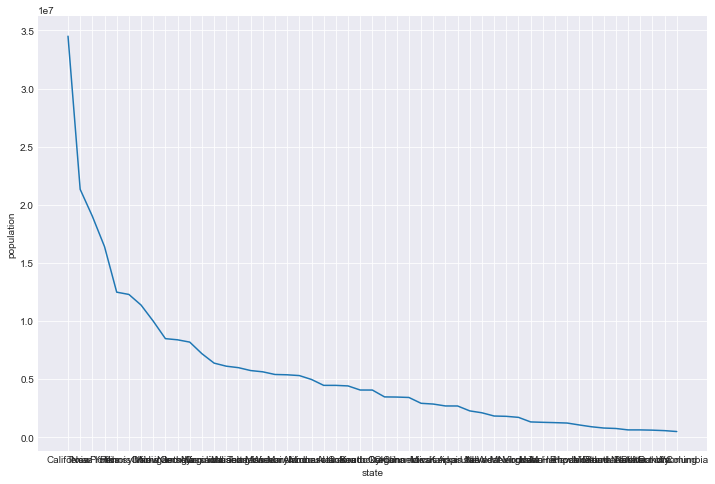

In [7]:
fig, ax = plt.subplots()
ax.plot(
    data['Geographic Area'].values,
    data['July 1, 2001 Estimate'].values,
    label='population'
)
ax.set_xlabel('state')
ax.set_ylabel('population')

So this isn't great - we can't see the x axis labels because there are too many of them and they overlap.

To fix this we could plot a subset of the data, but we can also just rotate the labels:

Text(0, 0.5, 'population')

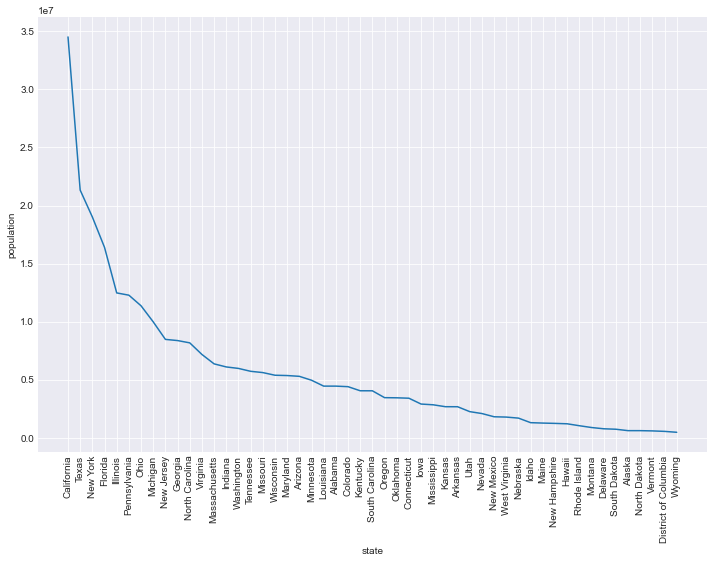

In [8]:
fig, ax = plt.subplots()
ax.plot(
    data['Geographic Area'].values,
    data['July 1, 2001 Estimate'].values,
    label='population'
)
plt.xticks(rotation=90)
ax.set_xlabel('state')
ax.set_ylabel('population')

For this kind of data set, I'd rather see bars than a line plot:

Text(0, 0.5, 'population')

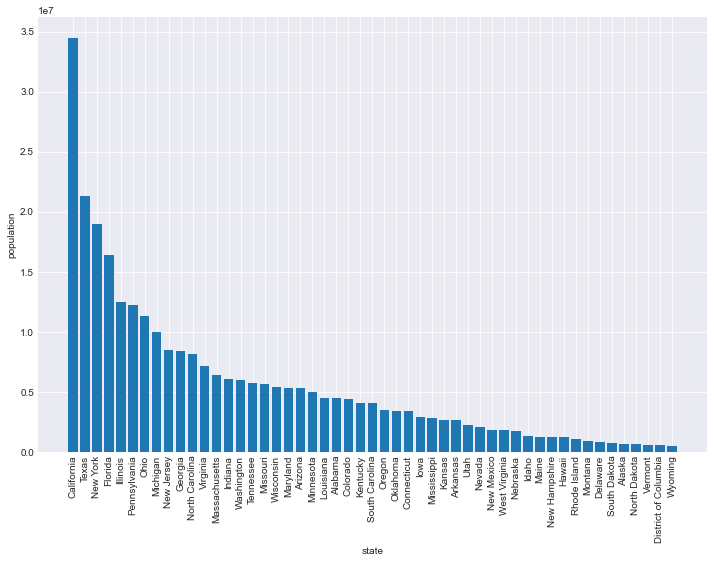

In [9]:
fig, ax = plt.subplots()
ax.bar(
    data['Geographic Area'].values,
    data['July 1, 2001 Estimate'].values,
    label='population'
)
plt.xticks(rotation=90)
ax.set_xlabel('state')
ax.set_ylabel('population')

Notice the units on th y-axis - they are in multiples of `1e7` - I would rather control that myself - so let's look at the data for that particular column and choose a decent multiplier:

In [10]:
data['July 1, 2001 Estimate'].describe()

count    5.100000e+01
mean     5.584253e+06
std      6.263147e+06
min      4.944230e+05
25%      1.517120e+06
50%      4.063011e+06
75%      6.247024e+06
max      3.450113e+07
Name: July 1, 2001 Estimate, dtype: float64

As we can see, we have data ranging from `10^5` (`100_000`) to `10^7` (`10_000_000`)

Based on the quartiles, most of the data is in the millions, so I'm going to rescale the data and plot that instead:

Text(0, 0.5, 'population (millions)')

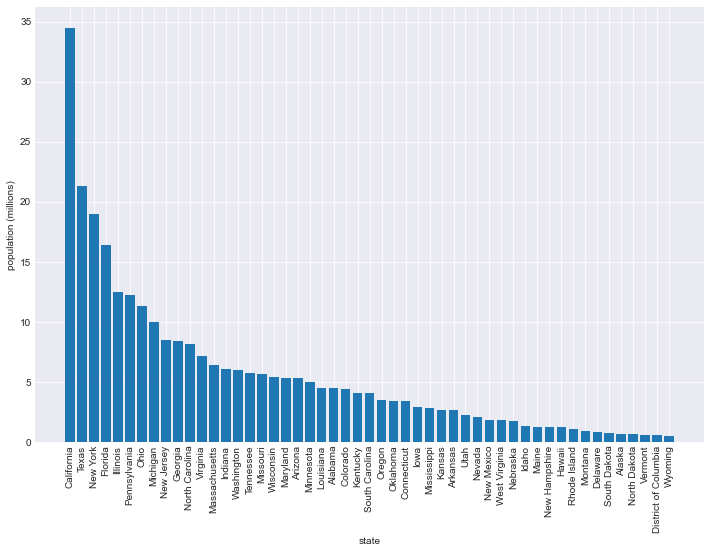

In [11]:
fig, ax = plt.subplots()
ax.bar(
    data['Geographic Area'].values,
    (data['July 1, 2001 Estimate']/1_000_000).values,
    label='population'
)
plt.xticks(rotation=90)
ax.set_xlabel('state')
ax.set_ylabel('population (millions)')

#### Histograms

Let's see how we can plot histograms. We can certainly do it by first generating a histogram using NumPy and then using a bar plot.

Let's generate some data first:

In [12]:
import random

random.seed(0)
data_1 = [random.gauss(0, 1) for _ in range(1_000_000)]

Or we could just use the NumPy module:

In [13]:
np.random.seed(0)
data_2 = np.random.normal(0, 1, size=1_000_000)

Let's use NumPy to generate a frequency distribution:

In [14]:
freq_1, bins_1 = np.histogram(data_1, bins=50)
freq_2, bins_2 = np.histogram(data_2, bins=50)

Remember that the output of `np.histogram` is a **tuple** containing the frequencies and the bins.

Remember also that the bins contain the righmost edge in addition to the left edges - so we'll omit this when charting.

Now let's plot each one and see what the distribution looks like, using a bar chart as well:

Text(0.5, 1.0, 'NumPy Generated')

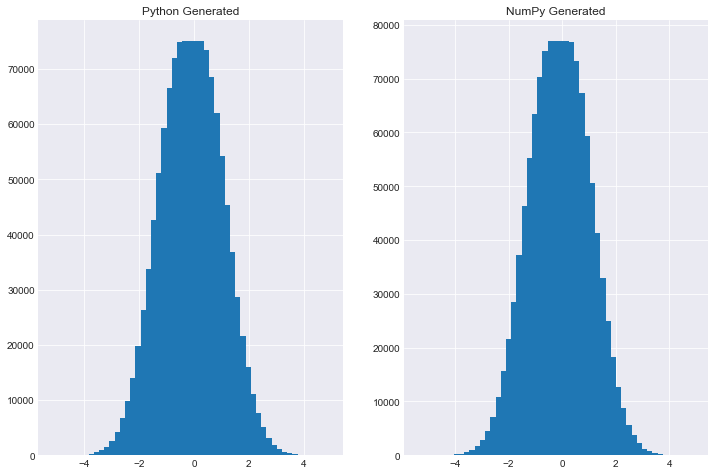

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(
    bins_1[:-1], 
    freq_1
)
ax1.set_title('Python Generated')

ax2.bar(
    bins_2[:-1], 
    freq_2
)
ax2.set_title('NumPy Generated')

We could also use a scatter plot:

Text(0.5, 1.0, 'NumPy Generated')

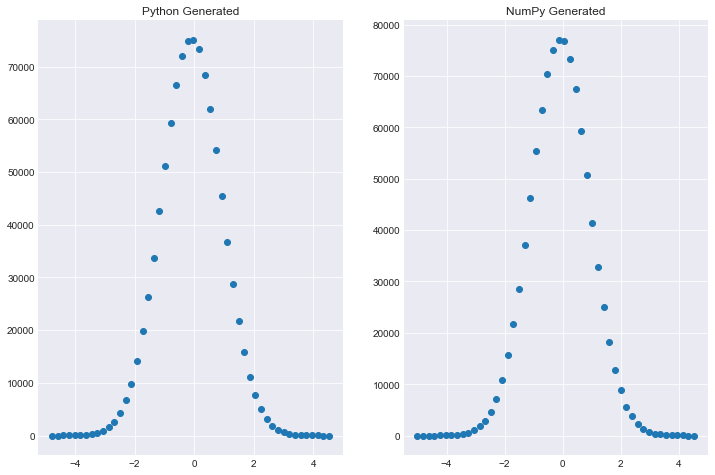

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(
    bins_1[:-1], 
    freq_1
)
ax1.set_title('Python Generated')

ax2.scatter(
    bins_2[:-1], 
    freq_2
)
ax2.set_title('NumPy Generated')

Or a line plot:

Text(0.5, 1.0, 'NumPy Generated')

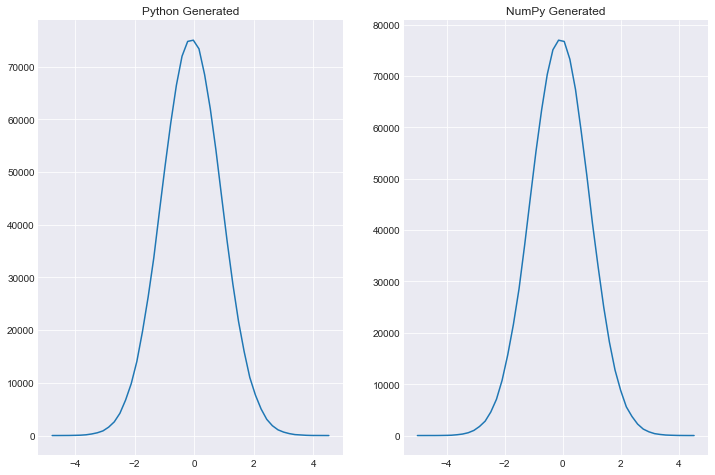

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(
    bins_1[:-1], 
    freq_1
)
ax1.set_title('Python Generated')

ax2.plot(
    bins_2[:-1], 
    freq_2
)
ax2.set_title('NumPy Generated')

We may want to draw some vertical lines on the chart to indicate the 10th, 50th and 90th percentiles:

In [18]:
percentiles_1 = [np.percentile(data_1, p) for p in (10, 50, 90)] 
percentiles_2 = [np.percentile(data_2, p) for p in (10, 50, 90)] 

In [19]:
percentiles_1, percentiles_2

([-1.2812666182390375, 0.0009163848983922004, 1.2824949027126349],
 [-1.2796066647113746, 0.002387730826572747, 1.282046718132256])

We can use the `axvline` method to do so:

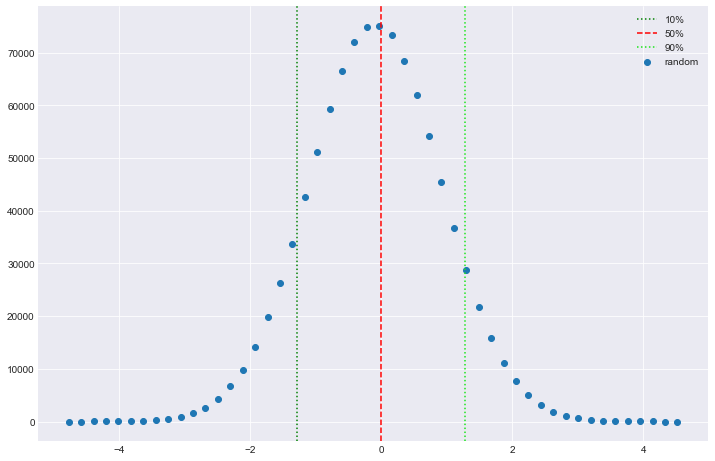

In [20]:
fig, ax = plt.subplots()
ax.scatter(
    bins_1[:-1], 
    freq_1,
    label='random'
)
ax.axvline(percentiles_1[0], linestyle=':', color='green', label='10%')
ax.axvline(percentiles_1[1], linestyle='--', color='red', label='50%')
ax.axvline(
    percentiles_1[2], 
    linestyle=':', 
    color=mpl.colors.to_rgba((0.1, 0.9, 0.1)), label='90%')
ax.legend()

Just like NumPy has a histogram function, MatPlotLib also has such a function which we can use directly, instead of using NumPy first.

(array([3.0000e+00, 2.0000e+00, 5.0000e+00, 3.0000e+00, 1.2000e+01,
        3.0000e+01, 6.0000e+01, 1.5400e+02, 2.9100e+02, 5.4600e+02,
        9.9500e+02, 1.7630e+03, 2.7990e+03, 4.5850e+03, 7.0550e+03,
        1.0752e+04, 1.5709e+04, 2.1621e+04, 2.8564e+04, 3.7135e+04,
        4.6301e+04, 5.5297e+04, 6.3388e+04, 7.0308e+04, 7.5101e+04,
        7.6963e+04, 7.6717e+04, 7.3256e+04, 6.7368e+04, 5.9287e+04,
        5.0686e+04, 4.1335e+04, 3.2899e+04, 2.4980e+04, 1.8217e+04,
        1.2751e+04, 8.7780e+03, 5.5890e+03, 3.7130e+03, 2.2290e+03,
        1.2550e+03, 7.2500e+02, 3.7200e+02, 2.1000e+02, 9.8000e+01,
        5.4000e+01, 2.2000e+01, 1.0000e+01, 4.0000e+00, 3.0000e+00]),
 array([-5.00229865, -4.80791943, -4.61354022, -4.419161  , -4.22478179,
        -4.03040257, -3.83602335, -3.64164414, -3.44726492, -3.25288571,
        -3.05850649, -2.86412727, -2.66974806, -2.47536884, -2.28098963,
        -2.08661041, -1.89223119, -1.69785198, -1.50347276, -1.30909355,
        -1.11471433, -0.92

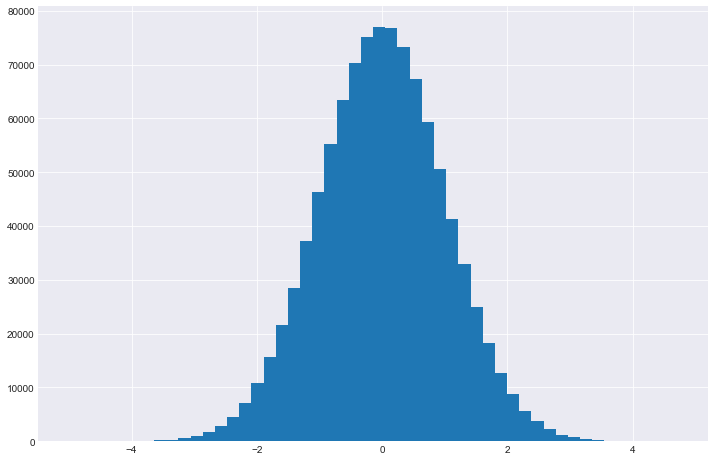

In [21]:
fig, ax = plt.subplots()
ax.hist(data_2, bins=50)

If we don't want to see the output of the hist function (besides the chart), we can simply assign it to some variable:

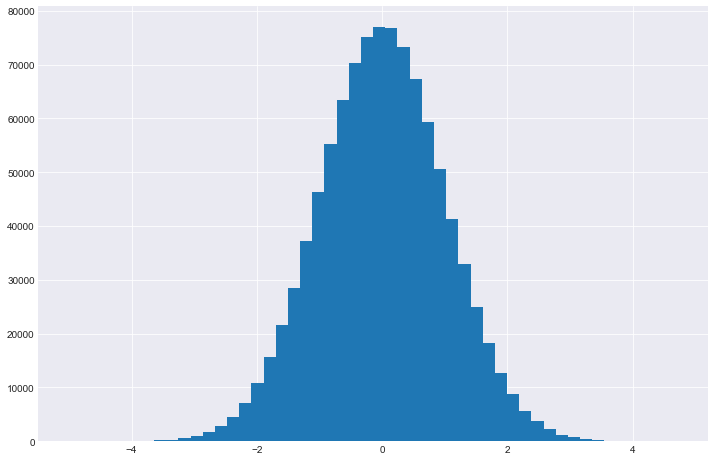

In [22]:
fig, ax = plt.subplots()
_ = ax.hist(data_2, bins=50)